In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns

sns.set()

#data = pd.read_csv('D:\\Projects\Data\\train.csv',nrows = 10000000)       # Contains the first 10 million data from 
                                                    # where we are going to select 1 million ramdom data for training and
                                                    # ten thousand data for deveopment 


In [0]:
link = 'https://drive.google.com/open?id=1cMhdQPbXvaMpOuwtxFFQTifAWXe_ce6y'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
#df3 = pd.read_csv()

# Creation of training set , development set and test set 
#training_set = data.sample(n = 1000000 , replace = False)    # 1 million random data from same distribution
#dev_set = data.sample(n = 10000 , replace = False)           # 10000 random data from same distribution

training_set = pd.read_csv('Filename.csv')
#dev_set = pd.read_csv('D:\\Projects\\Data\\dev_set.csv')
#test_set =  pd.read_csv('D:\\Projects\\Data\\test.csv')      # Actual test data must be used to check only after getting 
                                                             # a good final hypothesis

# Shape, data type, data sample and descriptive statistics of Training Set

### Shape

In [80]:
training_set.shape

(1000000, 9)

### Data Type

In [81]:
training_set.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [82]:
training_set.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,6846288,2014-08-14 01:36:34.0000001,6.5,2014-08-14 01:36:34 UTC,-73.975764,40.753898,-73.961381,40.769729,1
1,6026469,2015-02-24 09:56:15.0000005,6.0,2015-02-24 09:56:15 UTC,-73.974663,40.756310,-73.980339,40.760742,1
2,6472844,2014-01-14 20:12:06.0000001,5.5,2014-01-14 20:12:06 UTC,-73.970602,40.785972,-73.955813,40.783007,1
3,7672835,2012-04-06 07:02:34.0000001,8.1,2012-04-06 07:02:34 UTC,-74.007823,40.732122,-73.983278,40.761789,1
4,5340043,2009-03-29 20:33:54.0000002,7.4,2009-03-29 20:33:54 UTC,-73.996974,40.737093,-73.977298,40.729153,1


### Descriptive statistics 

In [83]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,999992.000000,999992.000000,1000000.000000
mean,4.998324e+06,11.361415,-72.495018,39.922878,-72.504531,39.911158,1.685234
std,2.885680e+06,9.893425,12.260718,9.391801,12.781010,9.858497,1.346792
min,5.000000e+00,-107.750000,-2404.643242,-2875.860745,-3004.395947,-3271.296725,0.000000
25%,2.500745e+06,6.000000,-73.992062,40.734936,-73.991390,40.734032,1.000000
50%,4.997443e+06,8.500000,-73.981785,40.752627,-73.980137,40.753186,1.000000
75%,7.498032e+06,12.500000,-73.967091,40.767121,-73.963633,40.768122,2.000000
max,9.999971e+06,952.000000,2417.411523,2977.030610,2889.997293,3305.291182,208.000000


# Shape, data type, data sample and descriptive statistics of Development Set

### Shape

In [0]:
#dev_set.shape

### Data Type

In [0]:
#dev_set.dtypes

### Data Sample

In [0]:
#dev_set.head()

### Descriptive statistics 

In [0]:
#dev_set.describe()

# Shape, data type, data sample and descriptive statistics of Test Set



### Shape

In [0]:
#test_set.shape

### Data Type

In [0]:
#test_set.dtypes

### Data Sample

In [0]:
#test_set.head()

### Descriptive statistics 

In [0]:
#test_set.describe()

# Data Cleansing

## Removing Null values from the datasets

In [92]:
training_set.isnull().sum().sort_values(ascending = False)

dropoff_latitude     8
dropoff_longitude    8
passenger_count      0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
Unnamed: 0           0
dtype: int64

In [0]:
#dev_set.isnull().sum().sort_values(ascending = False)

In [0]:
#test_set.isnull().sum().sort_values(ascending = False)

In [95]:
training_set = training_set.drop(training_set[training_set.isnull().any(1)].index , axis = 0)
training_set.shape

(999992, 9)

In [0]:
#dev_set = dev_set.drop(dev_set[dev_set.isnull().any(1)].index , axis = 0)
#dev_set.shape

In [0]:
#test_set = test_set.drop(test_set[test_set.isnull().any(1)].index , axis = 0)
#test_set.shape

## Removing rows from the dataset having invalid data 

In [98]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999920e+05,999992.000000,999992.000000,999992.000000,999992.000000,999992.000000,999992.000000
mean,4.998340e+06,11.361356,-72.495006,39.922871,-72.504531,39.911158,1.685247
std,2.885675e+06,9.893396,12.260767,9.391838,12.781010,9.858497,1.346789
min,5.000000e+00,-107.750000,-2404.643242,-2875.860745,-3004.395947,-3271.296725,0.000000
25%,2.500768e+06,6.000000,-73.992062,40.734936,-73.991390,40.734032,1.000000
50%,4.997454e+06,8.500000,-73.981785,40.752627,-73.980137,40.753186,1.000000
75%,7.498037e+06,12.500000,-73.967091,40.767121,-73.963633,40.768122,2.000000
max,9.999971e+06,952.000000,2417.411523,2977.030610,2889.997293,3305.291182,208.000000


In [99]:
training_set['fare_amount'].describe()

count    999992.000000
mean         11.361356
std           9.893396
min        -107.750000
25%           6.000000
50%           8.500000
75%          12.500000
max         952.000000
Name: fare_amount, dtype: float64

### Training_set is having negative value fare so we will remove those rows

In [100]:
from collections import Counter
Counter(training_set['fare_amount']<0)

Counter({False: 999953, True: 39})

In [101]:
training_set = training_set.drop(training_set[training_set['fare_amount']<0].index, axis=0)
training_set.shape

(999953, 9)

In [102]:
training_set['fare_amount'].describe()

count    999953.000000
mean         11.362299
std           9.891592
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         952.000000
Name: fare_amount, dtype: float64

### Passenger count is greater than  7

In [103]:
training_set['passenger_count'].describe()

count    999953.000000
mean          1.685259
std           1.346807
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [0]:
#len(training_set[training_set['passenger_count']>7])

In [105]:
#### Since we are restricting to yellow cabs or medallion taxi. So we are considering 
#### a maximum of 7 passengers can operate in a taxi at a time.
Counter(training_set['passenger_count']>8)

Counter({False: 999950, True: 3})

In [106]:
training_set = training_set.drop(training_set[training_set['passenger_count']>8].index, axis = 0)
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999500e+05,999950.000000,999950.000000,999950.000000,999950.000000,999950.000000,999950.000000
mean,4.998332e+06,11.362317,-72.495314,39.923041,-72.504914,39.911368,1.684719
std,2.885689e+06,9.891601,12.259949,9.391610,12.780041,9.858218,1.308644
min,5.000000e+00,0.000000,-2404.643242,-2875.860745,-3004.395947,-3271.296725,0.000000
25%,2.500713e+06,6.000000,-73.992062,40.734936,-73.991390,40.734033,1.000000
50%,4.997449e+06,8.500000,-73.981785,40.752627,-73.980137,40.753187,1.000000
75%,7.498048e+06,12.500000,-73.967092,40.767122,-73.963634,40.768122,2.000000
max,9.999971e+06,952.000000,2417.411523,2977.030610,2889.997293,3305.291182,6.000000


### Removing invalid Longitude and Latitude 

In [107]:
training_set[['pickup_longitude','pickup_latitude']].describe()

,pickup_longitude,pickup_latitude
count,999950.000000,999950.000000
mean,-72.495314,39.923041
std,12.259949,9.391610
min,-2404.643242,-2875.860745
25%,-73.992062,40.734936
50%,-73.981785,40.752627
75%,-73.967092,40.767122
max,2417.411523,2977.030610


In [108]:
training_set[['dropoff_longitude','dropoff_latitude']].describe()

,dropoff_longitude,dropoff_latitude
count,999950.000000,999950.000000
mean,-72.504914,39.911368
std,12.780041,9.858218
min,-3004.395947,-3271.296725
25%,-73.991390,40.734033
50%,-73.980137,40.753187
75%,-73.963634,40.768122
max,2889.997293,3305.291182


#### Valid Longitude value = -180 to 180
#### Valid Latitude value = -90 to 90
#### Remove pickup cordinates and drop off cordinates which dont fall in this range 

##### Remove invalid pickup cordinates 

In [0]:
#print("Number of invalid pickup cordinates = ",len((training_set[training_set['pickup_latitude']<-90])or(training_set[training_set['pickup_latitude']>90])or(training_set[training_set['pickup_longitude']<-180])or(training_set[training_set['pickup_longitude']>180])))

In [110]:
training_set = training_set.drop(training_set[training_set['pickup_latitude']<-90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['pickup_latitude']>90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['pickup_longitude']<-180].index,axis = 0)
training_set = training_set.drop(training_set[training_set['pickup_longitude']>180].index, axis=0)
training_set.shape

(999922, 9)

##### Remove invalid drop off cordinates  

In [0]:
#print("Number of invalid drop off cordinates = ",len((training_set[training_set['dropoff_latitude']<-90])|(training_set[training_set['dropoff_latitude']>90])|(training_set[training_set['dropoff_longitude']<-180])|(training_set[training_set['dropoff_longitude']>180])))

In [113]:
training_set = training_set.drop(training_set[training_set['dropoff_latitude']<-90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['dropoff_latitude']>90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['dropoff_longitude']<-180].index,axis = 0)
training_set = training_set.drop(training_set[training_set['dropoff_longitude']>180].index, axis=0)
training_set.shape

(999904, 9)

In [114]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999040e+05,999904.000000,999904.000000,999904.000000,999904.000000,999904.000000,999904.000000
mean,4.998324e+06,11.362291,-72.490523,39.913228,-72.499445,39.917707,1.684741
std,2.885687e+06,9.891560,10.481499,6.126925,10.448725,6.113915,1.308666
min,5.000000e+00,0.000000,-121.285595,-74.824164,-121.285388,-74.178840,0.000000
25%,2.500705e+06,6.000000,-73.992061,40.734936,-73.991390,40.734033,1.000000
50%,4.997437e+06,8.500000,-73.981785,40.752627,-73.980137,40.753187,1.000000
75%,7.498032e+06,12.500000,-73.967093,40.767120,-73.963635,40.768122,2.000000
max,9.999971e+06,952.000000,40.826712,73.979307,40.855685,73.992735,6.000000


## Distance between pick up location and drop off location
#### The distance in a sphere can be calculated when latitudes and longitudes are given by Haversine formula
#### haversine(θ) = sin²(θ/2)

#### φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

#### a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

#### c = 2 * atan2( √a, √(1−a) )

#### d = R ⋅ c

#### d = Haversine distance

In [0]:
def haversine_distance(data):
    R = 6371        # Radius of earth in Kilo Meter
    
    pickup_data = data[['pickup_longitude','pickup_latitude']]
    dropoff_data = data[['dropoff_longitude','dropoff_latitude']]
    
    phi1 = np.radians(pickup_data['pickup_latitude'])
    phi2 = np.radians(dropoff_data['dropoff_latitude'])
    
    delta_phi = np.radians(dropoff_data['dropoff_latitude'] - pickup_data['pickup_latitude'])
    delta_lambda = np.radians(dropoff_data['dropoff_longitude'] - pickup_data['pickup_longitude'])
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin((delta_phi)/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R * c
    
    return d
    

In [0]:
training_set_distance = pd.DataFrame(haversine_distance(training_set) , columns=['Distance'])
training_set = pd.concat([training_set , training_set_distance] , axis = 1)

In [117]:
training_set.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,6846288,2014-08-14 01:36:34.0000001,6.5,2014-08-14 01:36:34 UTC,-73.975764,40.753898,-73.961381,40.769729,1,2.136860
1,6026469,2015-02-24 09:56:15.0000005,6.0,2015-02-24 09:56:15 UTC,-73.974663,40.756310,-73.980339,40.760742,1,0.686669
2,6472844,2014-01-14 20:12:06.0000001,5.5,2014-01-14 20:12:06 UTC,-73.970602,40.785972,-73.955813,40.783007,1,1.288050
3,7672835,2012-04-06 07:02:34.0000001,8.1,2012-04-06 07:02:34 UTC,-74.007823,40.732122,-73.983278,40.761789,1,3.893276
4,5340043,2009-03-29 20:33:54.0000002,7.4,2009-03-29 20:33:54 UTC,-73.996974,40.737093,-73.977298,40.729153,1,1.878308


In [118]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
count,9.999040e+05,999904.000000,999904.000000,999904.000000,999904.000000,999904.000000,999904.000000,999904.000000
mean,4.998324e+06,11.362291,-72.490523,39.913228,-72.499445,39.917707,1.684741,20.080816
std,2.885687e+06,9.891560,10.481499,6.126925,10.448725,6.113915,1.308666,373.674759
min,5.000000e+00,0.000000,-121.285595,-74.824164,-121.285388,-74.178840,0.000000,0.000000
25%,2.500705e+06,6.000000,-73.992061,40.734936,-73.991390,40.734033,1.000000,1.214177
50%,4.997437e+06,8.500000,-73.981785,40.752627,-73.980137,40.753187,1.000000,2.118771
75%,7.498032e+06,12.500000,-73.967093,40.767120,-73.963635,40.768122,2.000000,3.874873
max,9.999971e+06,952.000000,40.826712,73.979307,40.855685,73.992735,6.000000,12851.756269


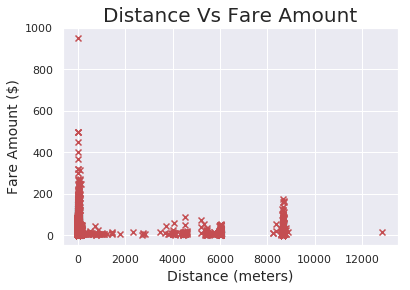

In [119]:
plt.scatter(training_set['Distance'] , training_set['fare_amount'] , c = 'r' , marker = 'x')
plt.title('Distance Vs Fare Amount',size = 20)
plt.xlabel('Distance (meters)',size = 14)
plt.ylabel('Fare Amount ($)',size = 14)
plt.show()

## Support Vector Regression on Feature Distance 

In [0]:
data = training_set.sample(n = 1000 , replace = False)
X = np.array(training_set['Distance']).reshape(len(training_set),1)
y = np.array(training_set['fare_amount'])


In [0]:
def svr_SGD_epsilion_insensitive(X,y):
  svr_SGD = SGDRegressor(loss = 'epsilon_insensitive' , max_iter = 100 , tol = 1e-3 , shuffle = True , epsilon = .1 , learning_rate = 'adaptive')
  y_SGD = svr_SGD.fit(X,y)
  
  return svr_SGD

def svr_SGD_squared_epsilon_insensitive(X,y):
  svr_SGD_squared = SGDRegressor(loss = 'squared_epsilon_insensitive' , max_iter = 100 , tol = 1e-3 , shuffle = True , epsilon = .1 , learning_rate = 'adaptive')
  y_SGD = svr_SGD_squared.fit(X,y)
  
  return svr_SGD_squared
  
  
  

In [0]:
from multiprocessing.pool import ThreadPool
from sklearn.linear_model import SGDRegressor

pool = ThreadPool(processes=1)

#t1 = pool.apply_async(svr_polynomial,(X,y,)) 
#t2 = pool.apply_async(svr_RBF, (X,y,)) 
#t3 = pool.apply_async(svr_linear, (X,y,)) 
t4 = pool.apply_async(svr_SGD_epsilion_insensitive, (X,y))
t5 = pool.apply_async(svr_SGD_squared_epsilon_insensitive, (X,y))

#svr_poly = t1.get()
#svr_rbf = t2.get()
#svr_lin = t3.get()
svr_SGD = t4.get()
svr_SGD_squared = t5.get()

In [0]:
SGD_predict = np.concatenate((svr_SGD.predict(X).reshape(len(training_set),1),y.reshape(len(training_set),1)) , axis = 1)
SGD_squared_predict = np.concatenate((svr_SGD_squared.predict(X).reshape(len(training_set),1),y.reshape(len(training_set),1)) , axis = 1)

In [206]:
from sklearn.metrics import mean_squared_error

SGD_predict = svr_SGD.predict(X)
SGD_squared_predict = svr_SGD_squared.predict(X)

SGD_error = mean_squared_error(y, SGD_predict)

SGD_squared_error = mean_squared_error(y, SGD_squared_predict)

print(SGD_error,SGD_squared_error)

106.62941594302481 1.8799762244203455e+23
